# SCS 3546: Deep Learning
> Assignment 1: Deep Learning Using Keras

### Your name & student number:

<pre> Gordon Chan </pre>

<pre> qq525548 </pre>

## Assignment Description

In this assignment you will demonstrate your ability to:

- Train a neural network using Keras to solve a regression problem.

- Perform sensible data preprocessing.

- Experiment with hyperparemter tuning and different model architectures to achieve best performance.



### Grade Allocation

**15 points total**

- Part 1: 4 Marks
- Part 2: 9 Marks
- Clarity: 2 Marks

The marks for clarity are awarded for code documentation and how well you explained/supported your answers, including the use of visualizations where appropriate.

In [78]:
# OPTIONAL : For model evaluation and for those who choose to use the KerasRegressor from keras.wrappers, you would need to install tensorflow 2.12 or 2.11.another option is to use the scikeras.
# please note that you may have many options and the below libraries are just meant to help you and to provide options

# !pip install tensorflow==2.12
# from keras.wrappers.scikit_learn import KerasRegressor

# !pip install scikeras
# from scikeras.wrappers import KerasClassifier, KerasRegressor


In [79]:
# setting up the notebook with important libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Preamble

### Hyperparameters

A hyperparameter is a parameter whose value is set before the learning process begins.

Some important Neural Networks hyperparameters include:

- number of hidden layers
- number of neurons
- learning rate
- activation function
- optimizer settings

Hyperparameters are crucial to the performance, speed, and quality of the machine learning models.

Through Hyper parameter optimization, we find a tuple (best combination) of hyperparameters that yields an optimal model which minimizes a predefined loss function on given test data.

Important hyperparameters that could be tuned include:

- num_hidden_layers
- neurons_per_layer
- dropout_rate
- activation
- optimizer
- learning_rate
- batch_size

### Loss Function

- MSE (Mean Squared Error) is used as the score/loss function that will be minimized for hyperparameter optimization.
- In this assignment, we are going to use Cross-Validation to calculate the score (MSE) for a given set of hyperparameter values

- MSE is a desirable metric because by taking the square root gives us an error value we can directly understand in the context of the problem; for example, in this assignment it translates to thousands of dollars

- Note: Your results may vary given the stochastic nature of the algorithm, evaluation procedure, or differences in numerical precision

## Dataset

We will be using mock data for this assignment. the outcome is the sale price for some products. we have created 13 features to predict the sale price.

- import provided mock data into your notebook.

- You are **not** expected to perform Exploratory Data Analysis (EDA) on this dataset.

- For the purpose of this assignment, your model's performance is not an important factor by itself - that is how far your sale price prediction is. The important factor is the changes that you observe when changing model architectures.

- The information that follow are meant to be optional and to help you get familiar with the data. Your efforts on this assignment should focus on **model training and hyperparameter tuning**, not on EDA.


# Assignment Start
***

- Please follow all instructions carefully.

- Use MSE (Mean Squared Error) as the score/loss function that will be minimized during optimization.








#Data Import

The code below imports the data for you as dataframe, then you may need to convert it to numpy arrays.  

In [80]:
# You can use the code below to import the data

# Option 3 - from local using the files that are available
import pandas as pd

# mount the colab
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [81]:
dir = "/content/gdrive/MyDrive/3546/assign_1/"

# Next, You need to upload tables to your G drive -  then you may need to update  paths below
train_y = f"{dir}/y_train.csv"
test_y = f"{dir}/y_test.csv"
train_x = f"{dir}/X_train.csv"
test_x = f"{dir}/X_test.csv"

# load the  data into a pandas dataframe for easy viewing and manipulation
y_train = pd.read_csv(train_y)
y_test = pd.read_csv(test_y)
X_train = pd.read_csv(train_x)
X_test = pd.read_csv(test_x)


In [82]:
y_train.isnull().sum(), y_test.isnull().sum(), X_train.isnull().sum(), X_test.isnull().sum()

(Unnamed: 0    0
 0             0
 dtype: int64,
 Unnamed: 0    0
 0             0
 dtype: int64,
 Unnamed: 0    0
 0             0
 1             0
 2             0
 3             0
 4             0
 5             0
 6             0
 7             0
 8             0
 9             0
 10            0
 11            0
 12            0
 dtype: int64,
 Unnamed: 0    0
 0             0
 1             0
 2             0
 3             0
 4             0
 5             0
 6             0
 7             0
 8             0
 9             0
 10            0
 11            0
 12            0
 dtype: int64)

In [83]:
# Hint : to make it easier, you may try to standardize your data upfront

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Part 1: Impact of Changing Model Architecture

In this section, we will be comparing a simple single-layer baseline model with two other models having a different network topology.

## a) Baseline model [2 points]

Use Keras to develop a baseline neural network model that has **one single fully-connected hidden layer with the same number of neurons as input features (i.e. 13 neurons).**

Make sure to **standardize** your features (i.e. subtract mean and divide by standard deviation) before training your model. You can also perform any other data-preprocessing that you deem necessary.

- Note: No activation function is used for the output layer because it is a regression problem and we are interested in predicting numerical values directly without transformation.

- The ADAM optimization algorithm should be used to optimize mean squared error loss function.

- Plot learning curves and report on both training and validation performance.

In [84]:
# determine the number of features and number of rows of data
X_train.shape

(404, 14)

In [85]:
model = Sequential()

# input is 14 features
model.add(Dense(units=14,activation='relu'))
# deep layer, fully connected
model.add(Dense(units=14,activation='relu'))
# output layer
model.add(Dense(units=1))

# use mse for regression, optimizer is ADAM
model.compile(loss='mse', optimizer='adam')


In [86]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50,verbose=0)
# set verbose to 0 to turn off log

<Axes: >

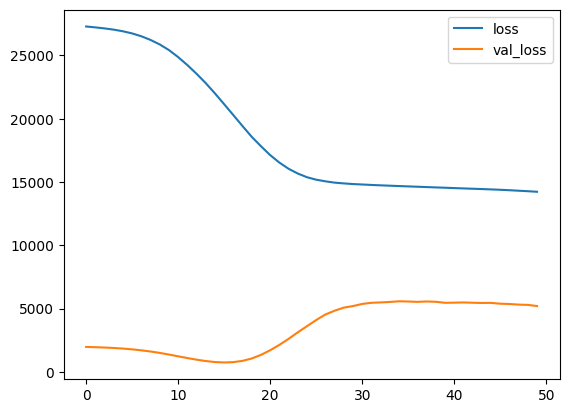

In [87]:
# plotting the loss and validation loss over training epochs.
losses = pd.DataFrame(model.history.history)
losses.plot()

## b) Deeper Network [1 point]

Construct and evaluate a model with 2 dense layers having a smaller number of neurons (e.g. 16, 8).

In [88]:
model = Sequential()

# input is 14 features
model.add(Dense(units=14,activation='relu'))

model.add(Dense(units=14,activation='relu'))
model.add(Dense(units=7,activation='relu'))
# output layer
model.add(Dense(units=1))

# use mse for regression, optimizer is ADAM
model.compile(loss='mse', optimizer='adam')


<Axes: >

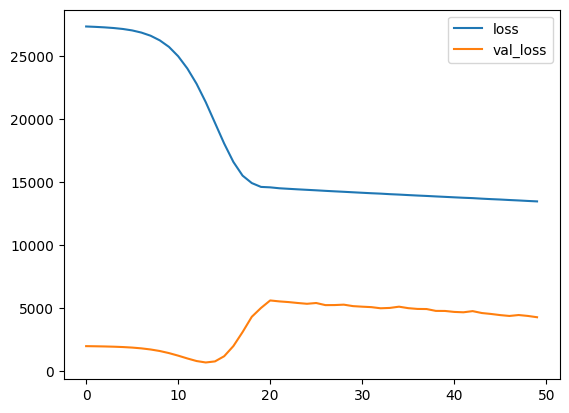

In [89]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

losses = pd.DataFrame(model.history.history)
losses.plot()

## c) Wider Network [1 point]

Construct and evaluate a wider model with more neurons (e.g. 32, 16).

In [90]:
model = Sequential()

# input is 14 features
model.add(Dense(units=14,activation='relu'))

model.add(Dense(units=28,activation='relu'))
model.add(Dense(units=14,activation='relu'))
# output layer
model.add(Dense(units=1))

# use mse for regression, optimizer is ADAM
model.compile(loss='mse', optimizer='adam')


<Axes: >

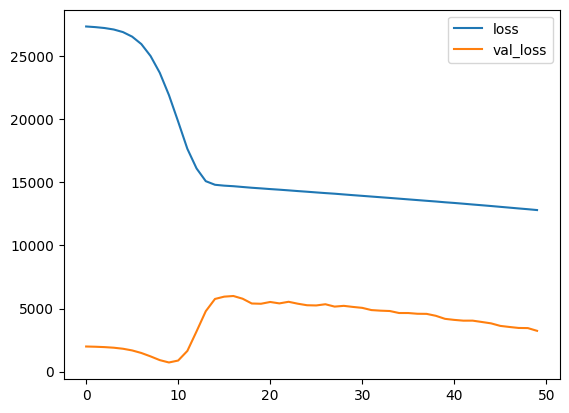

In [91]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

losses = pd.DataFrame(model.history.history)
losses.plot()

# Part 2: Hyperparameter Tuning Experiments

In the following experiments, you will evaluate and compare models trained with different hyperparameters. Please follow the specifications given for each model.

## a) Model 1 [2 points]

- 2 Dense layers:
  - The first with 64 neurons using a ReLU activation function.
  - The second with 64 neurons using a ReLU activation function.
- Choose an appropriate output layer and activation.
- Train model with 100 epochs and obtain cross-validated performance (e.g. with 3 cross-folds).
- Plot both loss and mean absolute error (i.e. learning curves) for both training and validation.
- Report MAE from CV with standard deviation.

In [105]:
def create_model():
  model = Sequential()

  # input is 14 features
  model.add(Dense(units=14,activation='relu'))

  model.add(Dense(units=64,activation='relu'))
  model.add(Dense(units=64,activation='relu'))
  # output layer
  model.add(Dense(units=2))

  # use mse for regression, optimizer is ADAM
  model.compile(loss='mse', optimizer='adam')

  return model


5/5 [==============================] - 0s 3ms/step


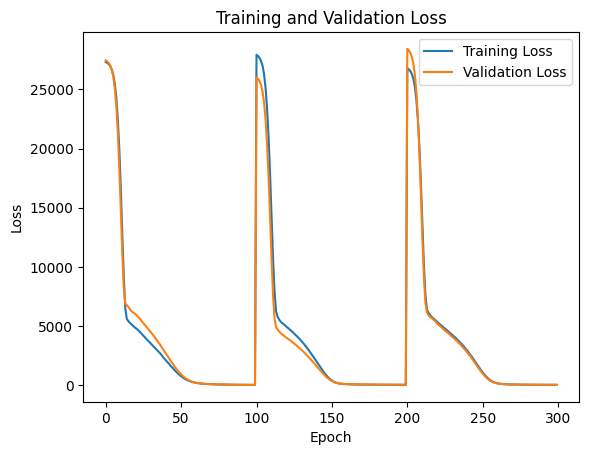

In [111]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Initialize KFold with 3 fold validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# To store the history of each fold
histories = []
mae_scores = []

# Convert X_train to a DataFrame
X_train_df = pd.DataFrame(X_train)

# KFold cross-validation
for train_index, val_index in kf.split(X_train_df):
    X_train_fold, X_val_fold = X_train_df.iloc[train_index], X_train_df.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model = create_model()  # Create a new instance of the model

    history = model.fit(X_train_fold, y_train_fold,
                        validation_data=(X_val_fold, y_val_fold),
                        epochs=100, verbose=0)  # Set verbose=0 to disable log

    histories.append(pd.DataFrame(history.history))

    # Predict and calculate MAE for the current fold
    y_val_pred = model.predict(X_val_fold)
    mae = mean_absolute_error(y_val_fold, y_val_pred)
    mae_scores.append(mae)


# Concatenate all histories into a single DataFrame
combined_history = pd.concat(histories, ignore_index=True)

# Plot the training and validation losses
combined_history[['loss', 'val_loss']].plot()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()


In [109]:
import numpy as np

mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
print(f'Mean Absolute Error (MAE) from cross-validation: {mean_mae:.4f}')
print(f'Standard Deviation of MAE: {std_mae:.4f}')

Mean MAE from cross-validation: 5.9252
Standard Deviation of MAE: 1.2798


<Axes: >

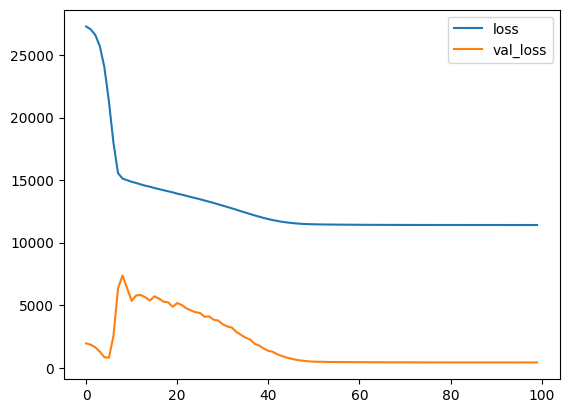

In [95]:
# rebuild model with the same configuration and validate with test data
model = Sequential()

# input is 14 features
model.add(Dense(units=14,activation='relu'))

model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=64,activation='relu'))
# output layer
model.add(Dense(units=1))

# use mse for regression, optimizer is ADAM
model.compile(loss='mse', optimizer='adam')

model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

losses = pd.DataFrame(model.history.history)
losses.plot()

## b) Model 2 [2 points]

- 2 Dense layers:
  - The first with 128 neurons using a ReLU activation function.
  - The second with 64 neurons using a ReLU activation function.
- Choose an appropriate output layer and activation.
- Train model with 100 epochs and obtain cross-validated performance (e.g. with 3 cross-folds).
- Plot both loss and mean absolute error (i.e. learning curves) for both training and validation.
- Report MAE from CV with standard deviation.

In [96]:
# your code here, use as many cells as you need

# be sure to comment on your results for each and every question, describing not just
# the what, but the 'how' and 'why' where possible, to demonstrate your understanding of
# course content

## c) Model 3 [2 points]

- Same as Model 2, but use tanh activation functions instead of relu.

In [97]:
# your code here, use as many cells as you need

# be sure to comment on your results for each and every question, describing not just
# the what, but the 'how' and 'why' where possible, to demonstrate your understanding of
# course content

## d) Model 4 [2 points]

- Same as Model 2, but use the rmsprop optimizer when training.

In [98]:
# your code here, use as many cells as you need

# be sure to comment on your results for each and every question, describing not just
# the what, but the 'how' and 'why' where possible, to demonstrate your understanding of
# course content

## e) Model Comparison [1 point]

Which model performed best? Offer your thoughts on why the particular choice of hyperparameters led to improved performance for this model.

In [99]:
# explain WHY you think the best model was better than the rest, in terms
# of how those hyperparameters theoretically impact the model

# provide visualizations (e.g. tables or comparison plot) to support your response where possible

NOTE: 2 additional points are awarded based on code documentation and overall clarity of work.

In [100]:
# We are looking for a clear explanation of results with each response. We want you to attempt to
# explain the _how_ and _why_ behind your answers, and not just the what, do demonstrate
# your knowledge of the concepts discussed in class. Answers should be backed up with
# visualizations (e.g. plots, charts).

# Code should be easy to follow by using sensical naming conventions for function and variable
# names, providing useful code comments, and refactoring repeated code into re-usable functions.